<a class="anchor" id="0.1"></a>
## Table of Content
***

0. [Step-00: Import Libraries](#0)

<!-- *** -->

1. [Step-01: Import Dataset](#1)
   - 1.1 [Data Overview](#1.1)
   - 1.2 [Missing Values](#1.2)
   - 1.3 [Numerical Features](#1.3)
   - 1.4 [Discrete Features](#1.4)
   - 1.5 [Continuous Features](#1.5)
   - 1.6 [Catagorical Features](#1.6)
   
<!-- *** -->

2. [Step-02: Data Engineering](#2)
   - 2.1 [Exploratory Data Analysis. (EDA)](#2.1)
     - 2.1.1 [Before Normalization with (Plotting)](#2.1.1)
     - 2.1.2 [Apply Yeo-Johnson transformation](#2.1.2)
     - 2.1.3 [After Normalization with (Plotting)](#2.1.3)
   - 2.2 [Data Wrangling](#2.2)
     - 2.2.1 [Features Encoding](#2.2.1)
     - 2.2.2 [Features Scaling](#2.2.2)

<!-- *** -->

1. [Step-03: Data Cleaning or Organize](#3)
   - 3.1 [Remove Outliers](#3.1)

<!-- *** -->

4. [Step-04: Splitting (Training and Testing) Data](#4)

<!-- *** -->

5. [Step-05: Apply Techniques or Models](#5)
   - 5.1 [Decision Tree](#5.1)
   - 5.2 [Random Forest](#5.2)
   - 5.3 [Gaussian Naive Bayes](#5.3)
   - 5.4 [K-Nearest Neighbors](#5.4)
   - 5.5 [Logistic Regression](#5.5)

<!-- *** -->

6. [Step-06: Evaluate or Compare Models Accuracy](#6)

<!-- *** -->

7. [Apply Cross-Validation](#7)

<!-- *** -->

8. [Best Technique](#8)


## <span style="color:orange">Techniques: <span style="color:yellow">**Logistic Regression**</span>

### Problem:<span style="color:red"> **Classification**</span>

### Dataset: <span style="color:magenta">**Brain Stroke Prediction !**</span>

***

***

### <span style="color:cyan">Step: 00</span>: (Import Libraries) 

<a class="anchor" id="0"></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

<a class="anchor" id="1"></a>

In [2]:
# import Dataset !

df = pd.read_csv('brain_stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.shape

(5110, 12)

In [5]:
df = df.drop(['id'], axis=1)
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [6]:
df['bmi'] = df['bmi'].replace(np.nan, df.bmi.mean())
df['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

***

#### Data Overview

<a class="anchor" id="1.1"></a>


In [7]:
df.shape

(5110, 11)

In [8]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [12]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df.min()

gender                 Female
age                      0.08
hypertension                0
heart_disease               0
ever_married               No
work_type            Govt_job
Residence_type          Rural
avg_glucose_level       55.12
bmi                      10.3
smoking_status        Unknown
stroke                      0
dtype: object

In [14]:
df.max()

gender                  Other
age                      82.0
hypertension                1
heart_disease               1
ever_married              Yes
work_type            children
Residence_type          Urban
avg_glucose_level      271.74
bmi                      97.6
smoking_status         smokes
stroke                      1
dtype: object

#### Missing Values

<a class="anchor" id="1.2"></a>


In [15]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


#### Numerical Features

<a class="anchor" id="1.3"></a>


In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 6


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


#### Discrete Features 

<a class="anchor" id="1.4"></a>


In [17]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 3


['hypertension', 'heart_disease', 'stroke']

#### Continuous Features

<a class="anchor" id="1.5"></a>


In [18]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 3


['age', 'avg_glucose_level', 'bmi']

In [19]:
df[continous_Feature].head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.600000
1,61.0,202.21,28.893237
2,80.0,105.92,32.500000
3,49.0,171.23,34.400000
4,79.0,174.12,24.000000


#### Categorical Features

<a class="anchor" id="1.6"></a>


In [20]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

5


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [21]:
df[categorical_feature].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


---

### <span style="color:cyan">Step: 02</span>: Data Engineering

<a class="anchor" id="2"></a>

#### <span style="color:blue">**Exploratory Data Analysis. (EDA)**</span>


<a class="anchor" id="2.1"></a>

In [22]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<AxesSubplot:>

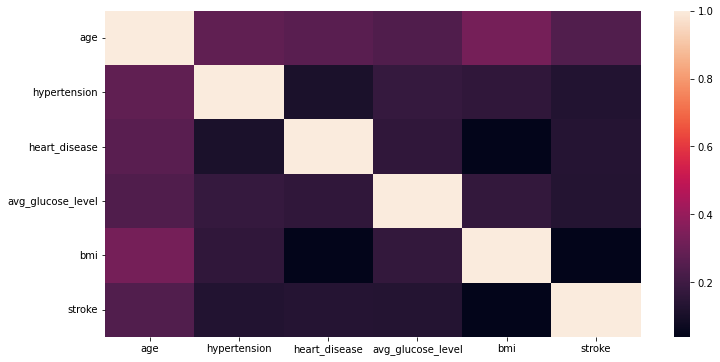

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

<AxesSubplot:>

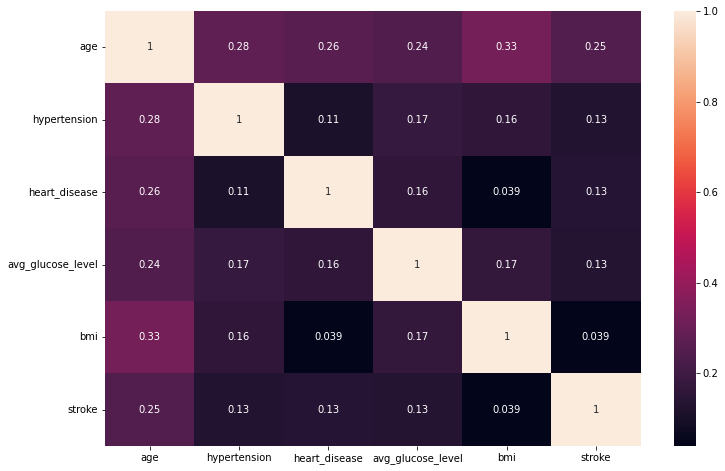

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [25]:
conti = [i for i in df.columns if i not in ['gender', 'ever_married', 'work_type',
                                            'Residence_type', 'smoking_status']]

***

##### Before Normalization with (Plotting)

<a class="anchor" id="2.1.1"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


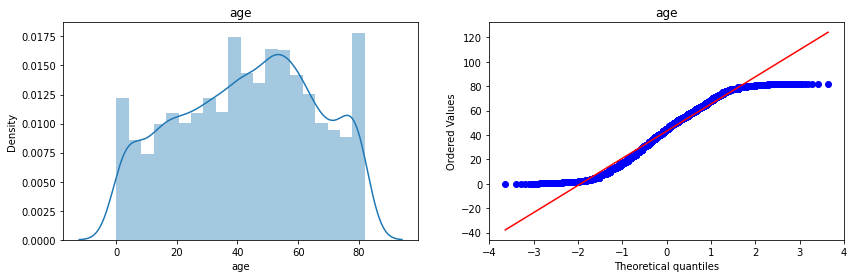

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


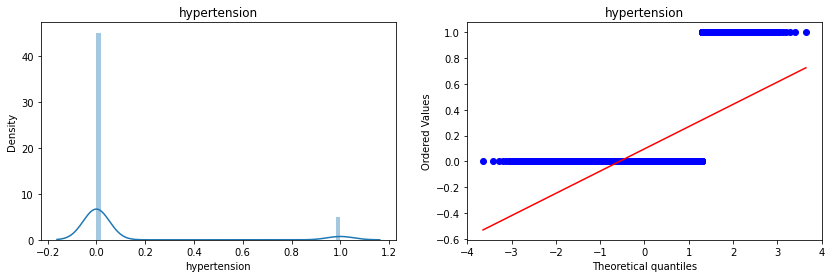

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


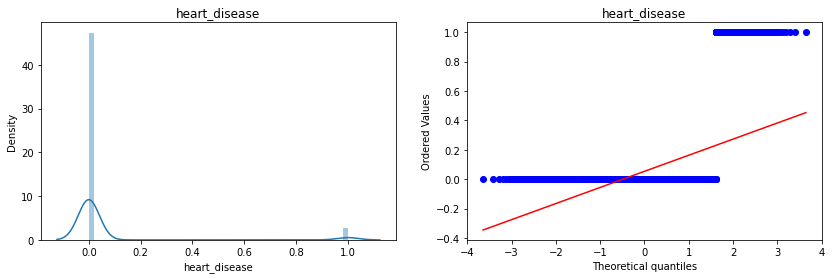

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


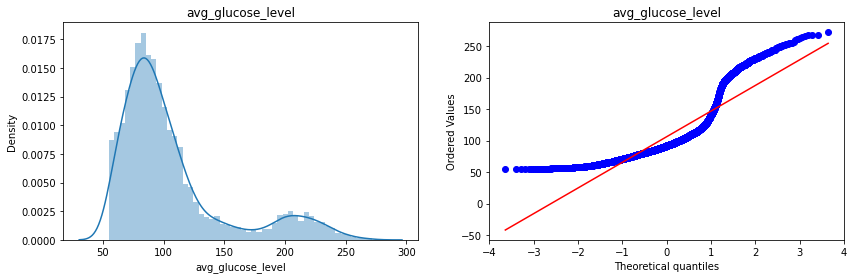

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


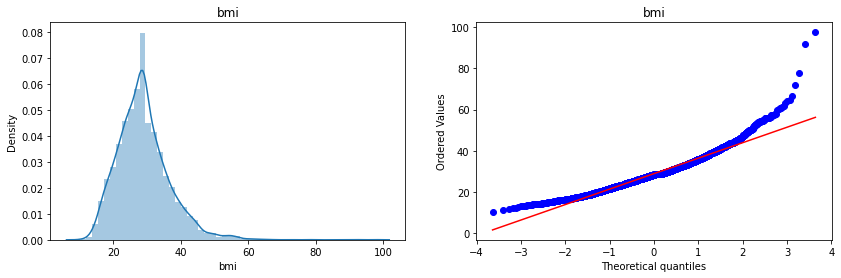

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


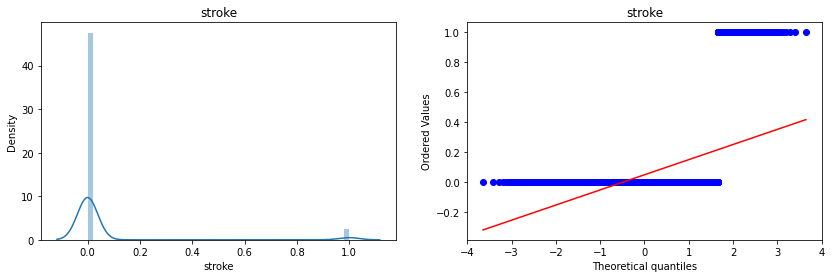

In [26]:
# Plotting the distplots without any transformation

for col in df[conti]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [27]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##### Apply Yeo-Johnson transform

<a class="anchor" id="2.1.2"></a>

In [28]:
features_normalize =[n for n in df.columns if n in ['age', 'avg_glucose_level', 'bmi']]
pt = PowerTransformer()
df[features_normalize] = pt.fit_transform(df[features_normalize]+0.00001)

In [29]:
df[features_normalize] = pd.DataFrame(df[features_normalize])
pd.DataFrame({'cols':df[features_normalize].columns,'Yeo_Johnson_lambdas':pt.lambdas_})

,cols,Yeo_Johnson_lambdas
0,age,0.860204
1,avg_glucose_level,-1.075924
2,bmi,-0.019969


##### After Normalization with (Plotting)

<a class="anchor" id="2.1.3"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


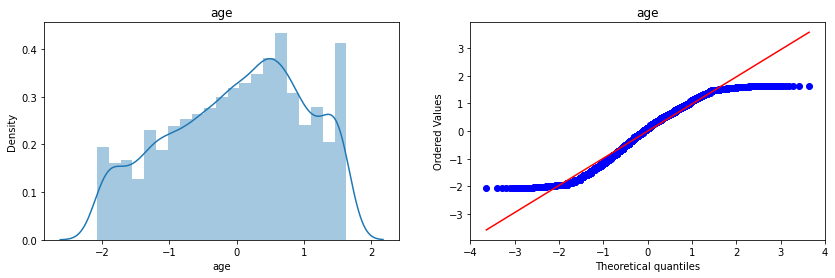

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


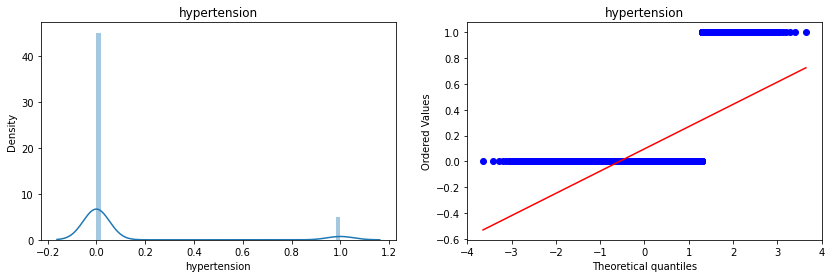

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


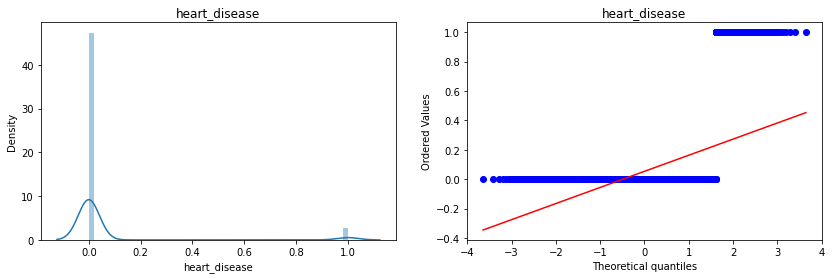

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


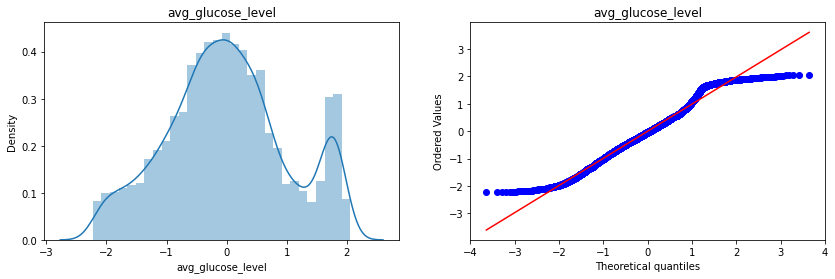

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


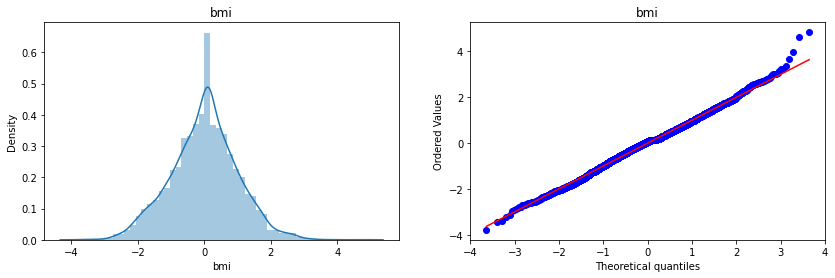

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


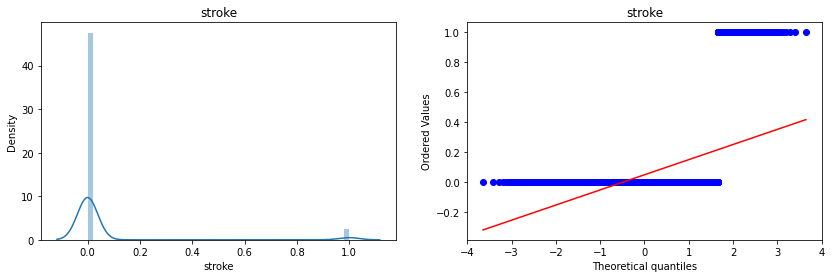

In [30]:
# Plotting the distplots with after transformation

for col in df[conti]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [31]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

***

#### <span style="color:blue">**Data Wrangling**</span>

<a class="anchor" id="2.2"></a>

In [32]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
df.shape

(5110, 11)

##### Feature Encoding

<a class="anchor" id="2.2.1"></a>

In [34]:
encoding = LabelEncoder()

encode_feature = [x for x in df.columns if x in ['gender','ever_married','work_type',
                                                 'Residence_type','smoking_status']]
for i in encode_feature:
    df[i] = encoding.fit_transform(df[i])


In [35]:
df[encode_feature].head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1


In [36]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.032930,0,1,1,2,1,1.862358,1.040978,1,1
1,0,0.788271,0,0,1,3,0,1.700414,0.128208,2,1
2,1,1.553087,0,1,1,2,0,0.394714,0.582040,2,1
3,0,0.288528,0,0,1,2,1,1.444941,0.801454,3,1
4,0,1.513514,1,0,1,3,0,1.472748,-0.586046,2,1


##### Feature Scaling

<a class="anchor" id="2.2.2"></a>

In [37]:
features_scale =[i for i in df.columns if i not in ['stroke']]

scaler = MinMaxScaler()
df[features_scale] = scaler.fit_transform(df[features_scale])

In [38]:
df[features_scale].head(1)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.5,0.838574,0.0,1.0,1.0,0.5,1.0,0.954682,0.560302,0.333333


In [39]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.838574,0.0,1.0,1.0,0.50,1.0,0.954682,0.560302,0.333333,1
1,0.0,0.772651,0.0,0.0,1.0,0.75,0.0,0.916852,0.454436,0.666667,1
2,0.5,0.978729,0.0,1.0,1.0,0.50,0.0,0.611846,0.507073,0.666667,1
3,0.0,0.637996,0.0,0.0,1.0,0.50,1.0,0.857175,0.532521,1.000000,1
4,0.0,0.968066,1.0,0.0,1.0,0.75,0.0,0.863670,0.371594,0.666667,1


***

### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

<a class="anchor" id="3"></a>

#### Remove Outliers

<a class="anchor" id="3.1"></a>

In [40]:
outliers = [i for i in df.columns if i not in ['stroke']]

In [41]:
print("Before Cleaning:", df.shape)

Before Cleaning: (5110, 11)


Before Removing Outliers


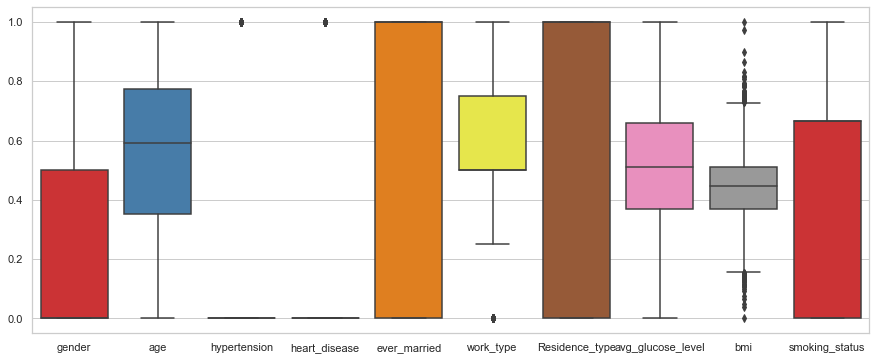

In [42]:
print("Before Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="Set1")
plt.show()            

***

In [43]:
# # bmi

# print("Before Removing (bmi) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             x="bmi",
#             palette="Set1")
# plt.show()            

# df = df[df['bmi']<0.75] 


# print("After Removing (bmi) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             x="bmi",
#             palette="Set1")
# plt.show()            

In [44]:
# print("Shape:", df.shape)

***

In [45]:
print("After Cleaning:", df.shape)

After Cleaning: (5110, 11)


After Removing Outliers


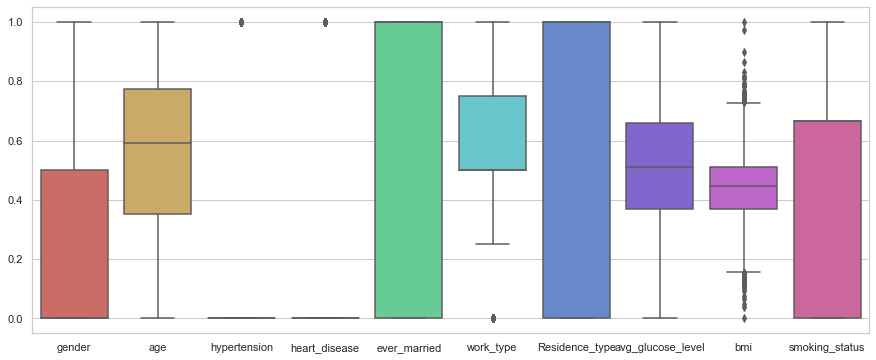

In [46]:
print("After Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="hls")
plt.show()            

***

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

<a class="anchor" id="4"></a>

In [47]:
X = df.drop(['stroke'], axis=1)
y = df[['stroke']]

In [48]:
X.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3237,0.0,0.486833,0.0,0.0,1.0,0.5,1.0,0.507388,0.469754,0.666667
914,0.0,0.739359,0.0,0.0,1.0,0.5,1.0,0.487608,0.471248,1.000000
52,0.0,0.968066,0.0,1.0,1.0,0.5,0.0,0.720687,0.435584,0.666667
3675,0.0,0.557392,0.0,0.0,1.0,0.5,0.0,0.422852,0.367865,0.333333
3889,0.0,0.816694,0.0,0.0,0.0,0.5,1.0,0.938652,0.635690,0.333333


In [49]:
y.sample(5)

,stroke
4257,0
4426,0
4632,0
3889,0
3182,0


In [50]:
y['stroke'].unique()

array([1, 0], dtype=int64)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

### <span style="color:cyan">Step: 05</span>: Apply Techniques !

<a class="anchor" id="5"></a>

### **Model Building**

<a class="anchor" id="5"></a>

#### <span style="color:yellow">Decision Tree Classifier</span>

<a class="anchor" id="5.1"></a>

In [52]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [53]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

# Decision tree
dt_score = np.round(accuracy_score(y_test, y_pred_dt)*100, 3)
print("Decision tree:", dt_score)

Decision tree: 91.292


#### <span style="color:yellow">Random Forest Classifier</span>

<a class="anchor" id="5.2"></a>

In [54]:
# RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1).fit(X_train, y_train)
rf_model

C:\Users\fahad\AppData\Local\Temp\ipykernel_980\110523400.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier(n_estimators=1).fit(X_train, y_train)


RandomForestClassifier(n_estimators=1)

In [55]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Random forest
rf_score = np.round(accuracy_score(y_test, y_pred_rf)*100, 3)
print("Random forest:", rf_score)

Random forest: 90.411


#### <span style="color:yellow">Gaussian Naive Bayes</span>

<a class="anchor" id="5.3"></a>

In [56]:
# GaussianNaiveBayes

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [57]:
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

# Gussian Naive Bays
gnb_score = np.round(accuracy_score(y_test, y_pred_gnb)*100, 3)
print("GussianNB:", gnb_score)

GussianNB: 86.791


#### <span style="color:yellow">K-Nearest Neighbors Classifier</span>

<a class="anchor" id="5.4"></a>

In [58]:
# KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [59]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

# K_Nearest Neighbours 
knn_score = np.round(accuracy_score(y_test, y_pred_knn)*100, 3)
print("KNN:", knn_score)

KNN: 93.836


#### <span style="color:yellow">Logistic Regression</span>

<a class="anchor" id="5.5"></a>

In [60]:
# LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [61]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

# Logistic Regression 
lr_score = np.round(accuracy_score(y_test, y_pred_lr)*100, 3)
print("Logistic Regression:", lr_score)

Logistic Regression: 93.933


***

### <span style="color:cyan">Step: 06</span>: Evaluate or Compare Models Accuracy

<a class="anchor" id="6"></a>

In [62]:
data={'Decision tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian_NB'              :[gnb_score],
      'KNN'                      :[knn_score],
      'Logistic Regression'      :[lr_score]
}

In [63]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Decision tree,Random Forest,Gaussian_NB,KNN,Logistic Regression
Score,91.292,90.411,86.791,93.836,93.933


***

#### <span style="color:magenta">**Apply Cross-Validation**</span>

<a class="anchor" id="7"></a>

In [64]:
lr_validate = np.round(cross_val_score(lr_model, X, y, cv=8, scoring='accuracy').mean()*100, 3)
print("After cross validation of LR:", lr_validate)

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

After cross validation of LR: 95.127


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

#### <span style="color:green">**Best Technique**</span>: <span style="color:yellow">**Logistic Regression**</span>

<a class="anchor" id="8"></a>

In [65]:
data_best={'Logistic Regression'             :[lr_score],
           'Cross-validate LR'               :[lr_validate]
}

In [66]:
Evaluation = pd.DataFrame(data_best, index=['Score'])
Evaluation

,Logistic Regression,Cross-validate LR
Score,93.933,95.127


***

***

***